# Windy Gridworld
J'implémente la méthode vanille Sarsa pour WindyGridworld.
L'agent part toujours du meme point S(start) et doit atteindre un point G (Goal).
A chaque pas de temps, si le nouvel etat s n'est pas G alors la récompense est négative, et soit $R=-1$

In [21]:
import numpy as np
from IPython.display import clear_output
import time 
import matplotlib.pyplot as plt

## Mise en place de l'environnement

In [3]:
#actions
actions = [(0,1), (0, -1), (1, 0), (-1, 0)]
#diagonal actions
#actions = [(0,1), (0,-1), (1,0), (-1, 0), (1,1), (1,-1), (-1,1), (-1, -1)]
number_actions = len(actions)
Nx = 9
Ny = 6
#variables for the policy
alpha = .5
epsilon = .1
R = -1
gamma =1
# Goal and start points
G = (7,3)
S = (0,3)

In [4]:
def grid(s):
    assert(0<=s[0]<=Nx and 0<=s[1]<=Ny)
    P = np.zeros((10,7))
    P[G] = 3
    if s[0]==G[0] and s[1]==G[1]:
        P[G] = 10
    else:
        P[s] = 100
    print(P.T)

In [5]:
grid((5,6))

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   3.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 100.   0.   0.   0.   0.]]


Let's define the Sarsa update rule

In [6]:
def update_Sarsa(s, a, R, s_, a_):
    if not(s[0] == G[0] and s[1]==G[1]):
        result = Q[s[0], s[1], a] + alpha*(R+gamma*Q[ s_[0], s_[1], a_,] - Q[s[0], s[1], a ])
    else:
        result = Q[s[0], s[1], a] + alpha*(gamma*Q[s_[0], s_[1], a_] - Q[s[0], s[1],a, ])
    return result

In [7]:
def action_max(Q,s):
    argmax = None
    maxx = Q[s[0], s[1], 0]
    for (j,q) in enumerate(Q[s[0], s[1], :]):
        if q >=maxx:
            maxx   = q
            argmax = j
    return argmax 

In [8]:
def new_state(s,a):
    wind = [0,0,0,-1,-1,-1,-2,-2,-1,0]
    if Nx>= s[0]+actions[a][0]>=0 and Ny>= s[1]+actions[a][1]>=0:
        s_ = (s[0]+actions[a][0],max(0, s[1]+wind[s[0]]+actions[a][1]))
    else:
        s_ = s 
    return s_

In [9]:
s = (0,3)
grid(s)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [100.   0.   0.   0.   0.   0.   0.   3.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]


We initialize Q

In [28]:
Q = np.zeros((Nx+1,Ny+1, number_actions), dtype='float') #Q[statex ,statey, action]
k = 0

We now create the the on-policy TD control loop

In [29]:
iterations = []

In [30]:
j = 0
while j <500+1: #number of episodes
    s = S
    a = action_max(Q,s)     #choose a from the state s using policy Q
    i =0
    grid(s)
    while True:     # loop over each step of the episode,  here we have an undiscounted episodic task
        s_ = new_state(s,a)         #new state
        if np.random.binomial(1, epsilon):
            a_ = np.random.randint(0,number_actions)
        else:
            a_ = action_max(Q,s_) #choose actions a_ from s_
        #print('s_ = ', s_, 'action values = ', Q[s_[0], s_[1], :],'a_', a_)
        clear_output(wait=True)
        print(f'Episode {k}')
        print(f'mouv {i}')
        grid(s_)
        #time.sleep(.1)
        Q[s[0], s[1], a] = update_Sarsa(s, a, R, s_, a_)         #update rule
        s = (s_[0], s_[1])
        a = np.copy(a_)
        i+=1
        if s[0] == G[0] and s[1]==G[1]:
            break
    iterations.append(i)
    j+=1
    k+=1

Episode 500
mouv 15
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 10.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


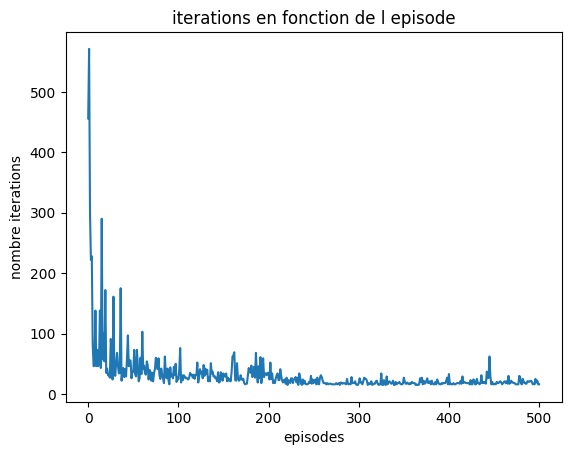

In [35]:
plt.plot(iterations)
plt.title('iterations en fonction de l episode')
plt.xlabel('episodes')
plt.ylabel('nombre iterations')
plt.show()

In [33]:
def test():
    s = S
    clear_output(wait=True)
    grid(s)
    time.sleep(1)
    mouv = 1
    while True:
        a = action_max(Q,s)
        s = new_state(s,a) 
        clear_output(wait=True)
        grid(s)
        print(f'mouv {mouv}')
        if s[0] == G[0] and s[1]==G[1]:
            break
        time.sleep(0.5)
        mouv+=1

In [34]:
test()

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 10.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
mouv 16
